1. Enumerate all possible labeled binary tree.
2. Sample.
3. Change labeled tree to unlabeled tree (ignore left/right).
4. See distribution.

In [13]:
import random
from ete3 import Tree

def random_ordered_binary_tree(leaves):
    """Flip 고려, labeled, ordered binary tree uniform 생성"""
    if len(leaves) == 1:
        return Tree(name=leaves[0])
    
    # 좌/우 subset 크기 랜덤 선택
    n = len(leaves)
    lsize = random.randint(1, n-1)
    
    # 좌측 leaf subset 랜덤 선택
    left_leaves = random.sample(leaves, lsize)
    right_leaves = [l for l in leaves if l not in left_leaves]
    
    # 재귀 생성
    left_tree = random_ordered_binary_tree(left_leaves)
    right_tree = random_ordered_binary_tree(right_leaves)
    
    # root 생성 및 좌/우 연결
    root = Tree()
    root.add_child(left_tree)
    root.add_child(right_tree)
    return root

def canonical_form(tree):
    """Flip 무시, leaf 이름 무시 topology canonical string 생성"""
    if tree.is_leaf():
        return "L"  # 모든 leaf를 동일하게 처리
    children = [canonical_form(c) for c in tree.get_children()]
    children.sort()  # 좌/우 순서 무시
    return "(" + ",".join(children) + ")"

In [22]:
from collections import Counter
import numpy as np

n = 8  # 테스트용, 실제 n=8 가능
leaves = [chr(65+i) for i in range(n)]
num_samples = pow(10, 6)
num_repeats = pow(10, 2)

topo_counts = []

for rep in range(num_repeats):
    counter = Counter()
    for _ in range(num_samples):
        tree = random_ordered_binary_tree(leaves)
        topo = canonical_form(tree)
        counter[topo] += 1
    topo_counts.append(counter)

# 평균과 표준편차 계산
all_topos = set().union(*[c.keys() for c in topo_counts])
means = {t: np.mean([c.get(t,0)/num_samples for c in topo_counts]) for t in all_topos}
stds = {t: np.std([c.get(t,0)/num_samples for c in topo_counts]) for t in all_topos}

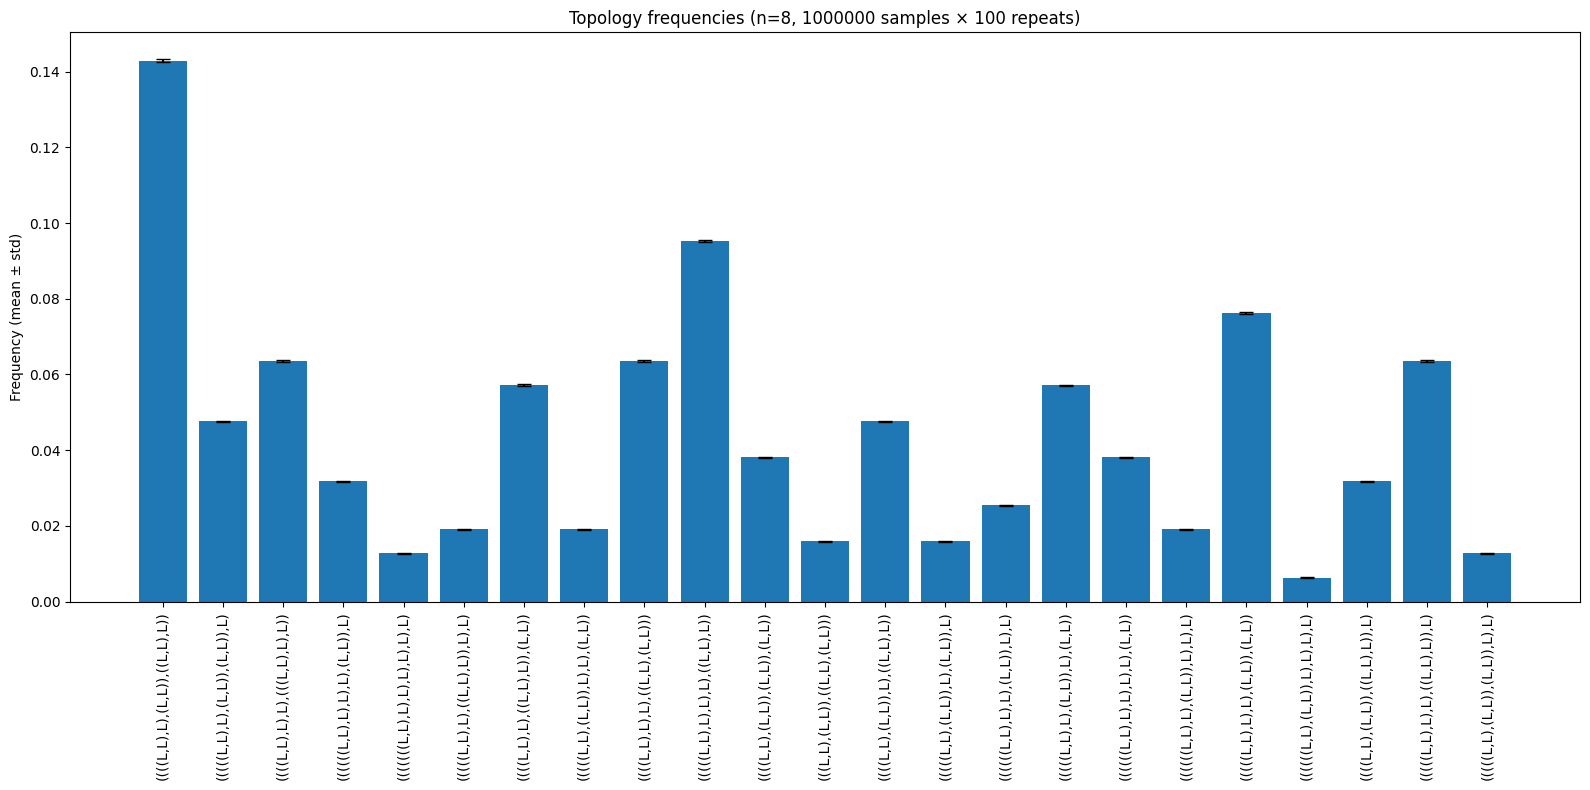

In [23]:
import matplotlib.pyplot as plt

topo_labels = list(means.keys())
topo_values = [means[t] for t in topo_labels]
topo_err = [stds[t] for t in topo_labels]

plt.figure(figsize=(16,8))
plt.bar(range(len(topo_labels)), topo_values, yerr=topo_err, capsize=5)
plt.xticks(range(len(topo_labels)), topo_labels, rotation=90)
plt.ylabel("Frequency (mean ± std)")
plt.title(f"Topology frequencies (n={n}, {num_samples} samples × {num_repeats} repeats)")
plt.tight_layout()
plt.show()

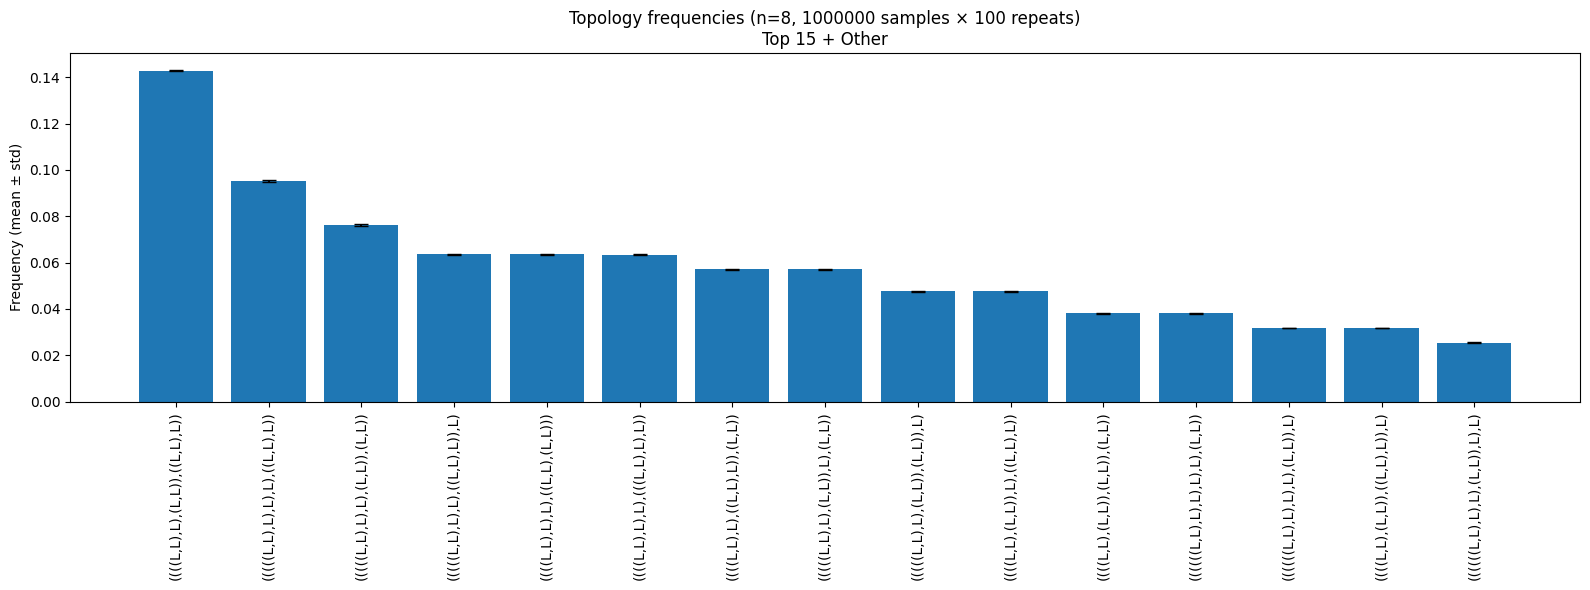

In [24]:
top_n = 15
topo_values_sorted = sorted(means.items(), key=lambda x: x[1], reverse=True)

# Top N topology 문자열
topo_labels = [t[0] for t in topo_values_sorted[:top_n]]  
topo_values = [t[1] for t in topo_values_sorted[:top_n]]

# Top N 표준편차
topo_err = [stds[t] for t in topo_labels]

# 나머지는 Other로 합치기
other_value = sum(t[1] for t in topo_values_sorted[top_n:])
other_err = np.std([means[t[0]] for t in topo_values_sorted[top_n:]])

topo_labels.append("Other")
topo_values.append(other_value)
topo_err.append(other_err)

# 시각화
plt.figure(figsize=(16,6))
plt.bar(range(len(topo_labels)-1), topo_values[:-1], yerr=topo_err[:-1], capsize=5)
plt.xticks(range(len(topo_labels)-1), topo_labels[:-1], rotation=90)
plt.ylabel("Frequency (mean ± std)")
plt.title(f"Topology frequencies (n={n}, {num_samples} samples × {num_repeats} repeats)\nTop {top_n} + Other")
plt.tight_layout()
plt.show()